<a href="https://colab.research.google.com/github/QasimKhan5x/Crop-Type-Mapping/blob/main/Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
idx2label = {
    1: "cassava",
    2: "rice",
    3: "maize", 
    4: "sugarcane"
}

In [ ]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
final_path = '/content/drive/MyDrive/VarunaOutput/final.parquet'
ndvi_path = '/content/drive/MyDrive/VarunaOutput/ndvi.parquet'

In [ ]:
ndvi_ds = pd.read_parquet(ndvi_path)
# ndvi_ds.head()

In [ ]:
ndvi_ds["class"].replace({"cassava": 1, "rice": 2, "maize" : 3, "sugarcane": 4}, inplace=True)
ndvi_ds

,20211222_B02,20211222_B03,20211222_B04,20211222_B05,20211222_B06,20211222_B07,20211222_B08,20211222_B8A,20211222_B11,20211222_B12,...,20210401_ndvi,20210215_ndvi,20210106_ndvi,20210101_ndvi,20210205_ndvi,20210121_ndvi,20210111_ndvi,20210116_ndvi,20210126_ndvi,20210210_ndvi
0,1120.0,1531.0,2076.0,3261.0,3864.0,3578.0,3650.0,4470.0,4794.0,3255.0,...,0.121763,0.204620,0.676617,0.646046,0.514675,0.349708,0.566370,0.574984,0.551004,0.016251
1,1138.0,1535.0,2035.0,3280.0,3896.0,3601.0,3540.0,4507.0,4797.0,3290.0,...,0.103303,0.167710,0.640164,0.590972,0.467104,0.333202,0.516144,0.525618,0.525228,0.022734
2,1183.0,1567.0,2130.0,3195.0,3822.0,3539.0,3619.0,4391.0,4720.0,3247.0,...,0.103567,0.160319,0.630704,0.605846,0.461133,0.321621,0.537868,0.508400,0.506081,0.021187
3,1235.0,1618.0,2179.0,2966.0,3572.0,3351.0,3601.0,4050.0,4465.0,3075.0,...,0.108158,0.185471,0.610289,0.607209,0.449466,0.318636,0.533226,0.525923,0.499668,0.027606
4,883.0,1430.0,1887.0,2586.0,3108.0,3009.0,3090.0,3460.0,3891.0,2731.0,...,0.116254,0.151584,0.572848,0.514308,0.427858,0.296121,0.443293,0.426191,0.465427,0.025349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236877,579.0,798.0,1047.0,1517.0,2082.0,1900.0,2222.0,2345.0,2386.0,1934.0,...,0.217877,0.184917,0.387891,0.334233,0.324266,0.368641,0.316932,0.376947,0.391092,0.138523
236878,566.0,887.0,948.0,1564.0,2975.0,2620.0,3115.0,3284.0,2712.0,1916.0,...,0.210669,0.253482,0.627102,0.563694,0.442593,0.542278,0.480606,0.562367,0.516373,0.278116
236879,560.0,860.0,979.0,1542.0,2836.0,2501.0,2814.0,3099.0,2671.0,1875.0,...,0.206102,0.189584,0.548940,0.480419,0.372256,0.519492,0.415214,0.525096,0.461217,0.238712
236880,543.0,793.0,901.0,1522.0,2696.0,2341.0,2738.0,2893.0,2596.0,1815.0,...,0.224883,0.195487,0.570929,0.537437,0.445663,0.494756,0.437424,0.524247,0.475580,0.253440


In [ ]:
X_ndvi = ndvi_ds.drop(["class"], axis=1)
y_crops = ndvi_ds["class"]

In [ ]:
finalds = pd.read_parquet(final_path)
# finalds.head()

In [ ]:
X_fds = finalds.drop(["class"], axis=1)
X_fds.head()

,20211222_B02,20211222_B03,20211222_B04,20211222_B05,20211222_B06,20211222_B07,20211222_B08,20211222_B8A,20211222_B11,20211222_B12,...,20210210_B02,20210210_B03,20210210_B04,20210210_B05,20210210_B06,20210210_B07,20210210_B08,20210210_B8A,20210210_B11,20210210_B12
0,1120.0,1531.0,2076.0,3261.0,3864.0,3578.0,3650.0,4470.0,4794.0,3255.0,...,6992.0,6865.0,6780.0,6370.0,6510.0,6430.0,7004.0,6278.0,6004.0,6553.0
1,1138.0,1535.0,2035.0,3280.0,3896.0,3601.0,3540.0,4507.0,4797.0,3290.0,...,7120.0,6952.0,6878.0,6503.0,6698.0,6572.0,7198.0,6446.0,6066.0,6687.0
2,1183.0,1567.0,2130.0,3195.0,3822.0,3539.0,3619.0,4391.0,4720.0,3247.0,...,7248.0,7004.0,6953.0,6540.0,6755.0,6595.0,7254.0,6474.0,6052.0,6740.0
3,1235.0,1618.0,2179.0,2966.0,3572.0,3351.0,3601.0,4050.0,4465.0,3075.0,...,7173.0,6967.0,6904.0,6450.0,6652.0,6474.0,7296.0,6344.0,5970.0,6681.0
4,883.0,1430.0,1887.0,2586.0,3108.0,3009.0,3090.0,3460.0,3891.0,2731.0,...,7098.0,6944.0,6921.0,6314.0,6522.0,6306.0,7281.0,6214.0,5887.0,6571.0


In [ ]:
cols = list()
for col in X_ndvi:
  if col.split('_')[1] == 'ndvi':
    cols.append(col)

X_ndvi = X_ndvi.drop(columns=cols)
X_ndvi.head()

,20211222_B02,20211222_B03,20211222_B04,20211222_B05,20211222_B06,20211222_B07,20211222_B08,20211222_B8A,20211222_B11,20211222_B12,...,20210210_B02,20210210_B03,20210210_B04,20210210_B05,20210210_B06,20210210_B07,20210210_B08,20210210_B8A,20210210_B11,20210210_B12
0,1120.0,1531.0,2076.0,3261.0,3864.0,3578.0,3650.0,4470.0,4794.0,3255.0,...,6992.0,6865.0,6780.0,6370.0,6510.0,6430.0,7004.0,6278.0,6004.0,6553.0
1,1138.0,1535.0,2035.0,3280.0,3896.0,3601.0,3540.0,4507.0,4797.0,3290.0,...,7120.0,6952.0,6878.0,6503.0,6698.0,6572.0,7198.0,6446.0,6066.0,6687.0
2,1183.0,1567.0,2130.0,3195.0,3822.0,3539.0,3619.0,4391.0,4720.0,3247.0,...,7248.0,7004.0,6953.0,6540.0,6755.0,6595.0,7254.0,6474.0,6052.0,6740.0
3,1235.0,1618.0,2179.0,2966.0,3572.0,3351.0,3601.0,4050.0,4465.0,3075.0,...,7173.0,6967.0,6904.0,6450.0,6652.0,6474.0,7296.0,6344.0,5970.0,6681.0
4,883.0,1430.0,1887.0,2586.0,3108.0,3009.0,3090.0,3460.0,3891.0,2731.0,...,7098.0,6944.0,6921.0,6314.0,6522.0,6306.0,7281.0,6214.0,5887.0,6571.0


In [ ]:
del ndvi_ds

In [ ]:
scaler_minmax = MinMaxScaler()
X_ndvi = scaler_minmax.fit_transform(X_ndvi)
# X_fds = scaler_minmax.fit_transform(X_fds)
# X = np.concatenate((X_fds, np.asarray(X_ndvi)), axis=1)

In [ ]:
from numpy import save, load
save('/content/drive/MyDrive/features.npy', X)
save('/content/drive/MyDrive/target.npy', y_crops)

In [ ]:
from numpy import save, load
X = load('/content/drive/MyDrive/features.npy')
y = load('/content/drive/MyDrive/target.npy')

In [ ]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
xgb = XGBClassifier(n_estimators = 100)
scores = cross_val_score(xgb, X_ndvi, y_crops, scoring='f1', cv=cv, n_jobs=-1, verbose=2)
print('F1 Score: %.3f (%.3f)' % (mean(scores), std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
import gc
gc.collect()

176

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_crops)
encoded_Y = encoder.transform(y_crops)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y,num_classes=4) #np_utils.to_categorical(encoded_Y)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
y_crops

0         4
1         4
2         4
3         4
4         4
         ..
236877    1
236878    1
236879    1
236880    1
236881    1
Name: class, Length: 236882, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ndvi, dummy_y, test_size=0.3, random_state=42,shuffle = True)


In [ ]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import regularizers
from keras import initializers
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD


In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)



model = Sequential()
model.add(Dense(200, input_shape=(781, ), activation='relu',kernel_regularizer=regularizers.l2(1e-5),kernel_initializer=keras.initializers.glorot_normal(seed=seed),bias_initializer='zeros'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 200)               156400    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 804       
                                                                 
Total params: 157,204
Trainable params: 157,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = tensorflow.keras.optimizers.Adadelta()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['acc'])

In [ ]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=100,
         shuffle=True)
score = model.evaluate(X_test, y_test, batch_size=100)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Epoch 1/10
2251/2251 [==============================] - 10s 3ms/step - loss: 3442.3474 - acc: 0.3348
Epoch 2/10
2251/2251 [==============================] - 9s 4ms/step - loss: 1566.7211 - acc: 0.3860
Epoch 3/10
2251/2251 [==============================] - 9s 4ms/step - loss: 597.6224 - acc: 0.4146
Epoch 4/10
2251/2251 [==============================] - 9s 4ms/step - loss: 161.4882 - acc: 0.4038
Epoch 5/10
2251/2251 [==============================] - 9s 4ms/step - loss: 31.4996 - acc: 0.4177
Epoch 6/10
2251/2251 [==============================] - 9s 4ms/step - loss: 11.5223 - acc: 0.4257
Epoch 7/10
2251/2251 [==============================] - 10s 4ms/step - loss: 6.6797 - acc: 0.4266
Epoch 8/10
2251/2251 [==============================] - 8s 4ms/step - loss: 4.6989 - acc: 0.4263
Epoch 9/10
2251/2251 [==============================] - 8s 4ms/step - loss: 3.6464 - acc: 0.4263
Epoch 10/10
119/119 [==============================] - 0s 2ms/step - loss: 2.6666 - acc: 0.4377

acc: 43.77%


In [ ]:
model = Sequential()
model.add(Conv1D(kernel_size = 5, strides=1,filters = 32, activation='relu',input_shape=(781,1)))
                    
print(model.input_shape)
print(model.output_shape)

model.add(MaxPooling1D(pool_size = (2), strides=(2)))
print(model.output_shape)

model.add(Conv1D (kernel_size = 5, strides=1, filters = 64, activation='relu'))
print(model.output_shape)

model.add(MaxPooling1D(pool_size = (2), strides=(2)))
print(model.output_shape)

model.add(Flatten())

print(model.output_shape)

model.add(Dense (1000, activation='relu'))
print(model.output_shape)

model.add(Dense(4, activation = 'softmax'))#,activity_regularizer=keras.regularizers.l2()))
print(model.output_shape)

#model.compile( loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.01), metrics=[keras.metrics.categorical_accuracy])
model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

(None, 781, 1)
(None, 777, 32)
(None, 388, 32)
(None, 384, 64)
(None, 192, 64)
(None, 12288)
(None, 1000)
(None, 4)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
X1 = np.expand_dims(X_train, axis=2)

In [ ]:
X1.shape,y_train.shape

((165817, 781, 1), (165817, 4))

In [ ]:
model.fit(X1, y_train, epochs=10, batch_size=50)

Epoch 1/10
3317/3317 [==============================] - 18s 5ms/step - loss: 43.3170 - accuracy: 0.8052
Epoch 2/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.2433 - accuracy: 0.9180
Epoch 3/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.2055 - accuracy: 0.9334
Epoch 4/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.1780 - accuracy: 0.9433
Epoch 5/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.1455 - accuracy: 0.9554
Epoch 6/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.1148 - accuracy: 0.9657
Epoch 7/10
3317/3317 [==============================] - 18s 6ms/step - loss: 0.0995 - accuracy: 0.9701
Epoch 8/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.0849 - accuracy: 0.9744
Epoch 9/10
3317/3317 [==============================] - 18s 5ms/step - loss: 0.0833 - accuracy: 0.9758
Epoch 10/10
3317/3317 [==============================] - 18s 5ms/step - 

In [ ]:
X2 = np.expand_dims(X_test, axis=2)

In [ ]:
scores = model.evaluate(X2, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2221/2221 [==============================] - 8s 4ms/step - loss: 0.0839 - accuracy: 0.9774

accuracy: 97.74%


In [ ]:
from sklearn.metrics import confusion_matrix
preds = model.predict(X_test)
preds = [i + 1 for i in np.argmax(preds, 1)]
# y_test = np.argmax(y_test, 1)
matrix = confusion_matrix(y_test, preds)

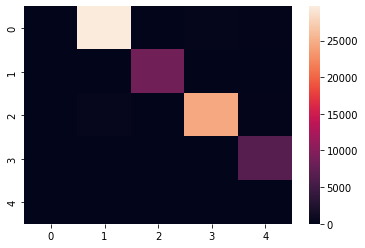

In [ ]:
import seaborn as sns
sns.heatmap(matrix)

In [ ]:
ndvi_test = '/content/drive/MyDrive/VarunaOutput/ndvi_test.parquet'
testds = pd.read_parquet(ndvi_test)

In [ ]:
preds = model.predict(testds)

In [ ]:
y_test.shape

(71065, 4)

# Submissions 

In [ ]:
%%shell
sudo add-apt-repository ppa:ubuntugis/ppa
sudo apt-get update
sudo apt-get install python-numpy gdal-bin libgdal-dev
pip install rasterio geopandas fastparquet

In [ ]:
import os
import glob
from pathlib import Path
from pprint import pprint
import gc

import rasterio as rio
from rasterio.features import rasterize
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
from scipy import ndimage 
import geopandas as gpd
from matplotlib import pyplot as plt
from rasterio.plot import show, show_hist

In [ ]:
grid_aoi = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/Grid_AOI/AOI.shp')
test_aoi = gpd.read_file('/content/drive/MyDrive/VarunaHackathon2022/testing_area/testdata.shp')

In [ ]:
f2020 = '/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2020'
f2021 = '/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021'

In [ ]:
reference_image_path = '/content/drive/MyDrive/VarunaHackathon2022/sentinel-2-image/2021/20210101/IMG_DATA/47PQS_20210101_B02.jp2'
reference_image = rio.open(reference_image_path)
reference_image.shape

(2051, 2051)

Class pixel count: {1: 100013}
Total Non-zero pixels: 100013


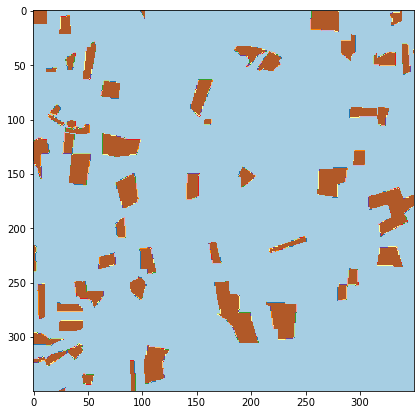

In [ ]:
profile = reference_image.profile
label = test_aoi.to_crs(profile['crs'])
test_image = rasterize(
    shapes=[(row.geometry) for i, row in label.iterrows()],
    out_shape=(profile['width'], profile['height']),
    transform=profile['transform']
    )
classes, pixel_counts = np.unique(test_image, return_counts=True)
print('Class pixel count:', dict(zip(classes[1:], pixel_counts[1:])))
print('Total Non-zero pixels:', pixel_counts[1:].sum())
plt.figure(figsize=(7,7))
plt.imshow(test_image[750:1100, 1250:1600], cmap='Paired')

In [ ]:
pixels = list()
for i, row in label.iterrows():

    img = rasterize([(row.geometry)],
    out_shape=(profile['width'], profile['height']),
    transform=profile['transform'])
    _, pixel_counts = np.unique(img, return_counts=True)
    pixels.append(pixel_counts[1])
    # print(pixel_counts)
    # plt.imshow(img)
    # plt.show()


In [ ]:
def eleMax(items, start=0, end=None):
    return max(items[start:end])

In [ ]:
test = [i + 1 for i in np.argmax(preds, 1)]

In [ ]:
new = list()
init = 0
end = 0
for i in range(0,len(pixels)):
    end+=pixels[i]
    new.append(eleMax(test,init, end)) 
    init+=pixels[i]

In [ ]:
submission = pd.DataFrame()
submission['crop_type'] = new
submission.head()

,crop_type
0,2
1,2
2,2
3,2
4,2


In [ ]:
submission.to_csv('submissions_test.csv')